# Taller 2

## 1. sistemas matriciales

### 1a.

In [1]:
import numpy as np

In [23]:
a = np.array([[2,4,5],[6,9,8],[4.1,5,3]])
b = np.array([[220],[490],[274]])
x_original = np.linalg.solve(a,b)
x_original

array([[40.],
       [10.],
       [20.]])

###  1b. 

Aplicaremos la función simpy by sym para en verificar si el sistema de ecuaciones tiene más de una soluación o si el problema afecta la única solución del sistema:

In [5]:
import sympy as sym
sym.init_printing()
x, y, z = sym.symbols('x, y, z')
f1 = sym.Eq(2*x+4*y+5*z,220)
f2 = sym.Eq(6*x+9*y+8*z,490)
f3 = sym.Eq(4.2*x+5*y+3*z,274)
x1 = sym.solve([f1,f2,f3],[x,y,z])
x1

In [22]:
#con numpy:
a_modificada = np.array([[2, 4, 5], [6,9,8],[4.2,5,3]])
b = np.array([220,490,274])

x_modificado= np.linalg.solve(a_modificada, b)
x_modificado

array([20.        , 31.53846154, 10.76923077])

b) Utilizar el delta para determinar el error relativo en A, en este caso, se usará la función con numpy y no sympy debido a que esta no tiene letras.

In [25]:
delta_a = np.linalg.norm(a_modificada - a, ord=np.inf) / np.linalg.norm(a, ord=np.inf)
print('El delta de a es:',delta_a)

El delta de a es: 0.004347826086956545


c) Calcular el numero de condición de a

In [26]:
kappa_a = np.linalg.cond(a, p=np.inf)
print('el numero de condición de a es:', kappa_a)

el numero de condición de a es: 766.0769230769235


d) identificar cota superior.

In [27]:
error_cota_superior_x = kappa_a * delta_a
print('El error de la cota superior es:',error_cota_superior_x)

El error de la cota superior es: 3.330769230769251


In [24]:
print("Error relativo real en x:", np.linalg.norm(x1 - x, ord=np.inf) / np.linalg.norm(x, ord=np.inf))

Error relativo real en x: 1.4423076923076978


### Interpretación de resultados: 
 La variación delta en (A) de  0.0043 refleja una mínima perturbación en la matriz. No obstante, dado el alto número de condición de A de 766.08, el sistema es muy sensible a cambios, lo que resulta en un error relativo real en x significativo de 144.23%. Esto indica que incluso pequeñas alteraciones en A pueden generar grandes desviaciones en las soluciones  x. La cota superior calculada 333.08% ofrece un techo estimado de este impacto. En resumen, pequeñas perturbaciones en A pueden llevar a cambios significativos y perjudiciales en las soluciones obtenidas.

# Punto 2. 

Descargue un conjunto de datos y elija 4 variables numéricas según su interés. Calcule el vector de medias, la matriz de covarianzas y su inversa.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Ejemplo_SalarioMultiple.csv')
df

,age,assets,profits,roa,sales,tenure,salary
0,49,10553.0,849.0,8.045106,13413.0,1,2468
1,58,14733.0,1390.0,9.434603,13406.0,5,6951
2,58,11538.0,98.0,0.849367,13223.0,6,2855
3,56,25199.0,452.0,1.793722,13195.0,5,2005
4,66,3008.1,190.0,6.316279,12848.6,19,5786
...,...,...,...,...,...,...,...
186,53,3068.7,198.6,6.471796,13617.5,17,641
187,61,5019.2,235.5,4.691983,13504.8,1,2076
188,61,21079.1,2474.3,11.738167,13462.7,12,15205
189,63,12659.8,1228.6,9.704735,13447.2,26,15413


In [4]:
df.dtypes

age          int64
assets     float64
profits    float64
roa        float64
sales      float64
tenure       int64
salary       int64
dtype: object

In [5]:
df2 = df.drop(['age','tenure','salary'], axis = 1)
df2

,assets,profits,roa,sales
0,10553.0,849.0,8.045106,13413.0
1,14733.0,1390.0,9.434603,13406.0
2,11538.0,98.0,0.849367,13223.0
3,25199.0,452.0,1.793722,13195.0
4,3008.1,190.0,6.316279,12848.6
...,...,...,...,...
186,3068.7,198.6,6.471796,13617.5
187,5019.2,235.5,4.691983,13504.8
188,21079.1,2474.3,11.738167,13462.7
189,12659.8,1228.6,9.704735,13447.2


In [6]:
import matplotlib.pyplot as plt

mean_assets, mean_profits, mean_roa, mean_sales= df2['assets'].mean() , df2['profits'].mean() , df2['roa'].mean() , df2['sales'].mean()
mean_assets, mean_profits, mean_roa, mean_sales

(48623.63089005236, 1258.1329842931939, 4.959163594910995, 20405.319895287957)

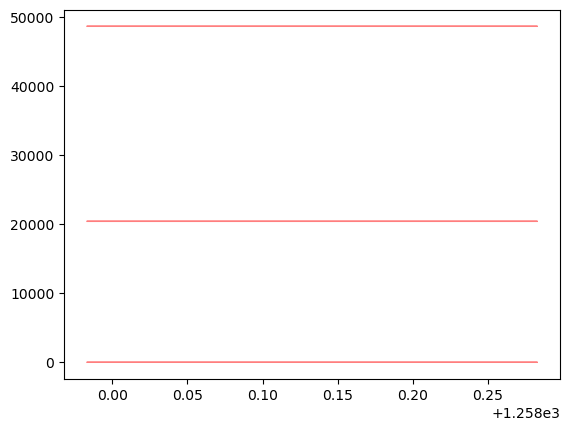

In [7]:
# vector de medias
# Dibujar vectores de medias
plt.arrow(mean_profits, mean_assets, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5, label="Mean Vectors")
plt.arrow(mean_profits, mean_roa, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)
plt.arrow(mean_profits, mean_sales, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)

#### Matriz covarianzas

In [8]:
import numpy as np
cov_matrix = np.cov(df2, rowvar = False)
invcov_matrix = np.linalg.inv(cov_matrix)

cov_matrix, invcov_matrix

(array([[ 8.59982034e+09,  9.30692838e+07, -1.15926185e+05,
          9.18925280e+08],
        [ 9.30692838e+07,  4.72915175e+06,  4.02745985e+03,
          3.31185440e+07],
        [-1.15926185e+05,  4.02745985e+03,  3.69021640e+01,
          2.55438195e+03],
        [ 9.18925280e+08,  3.31185440e+07,  2.55438195e+03,
          4.68771268e+08]]),
 array([[ 1.79649920e-10, -3.68304620e-09,  9.73056568e-07,
         -9.72612591e-11],
        [-3.68304620e-09,  5.78489074e-07, -7.24037543e-05,
         -3.32557173e-08],
        [ 9.73056568e-07, -7.24037543e-05,  3.78497790e-02,
          3.00158723e-06],
        [-9.72612591e-11, -3.32557173e-08,  3.00158723e-06,
          4.65704643e-09]]))

## 2. Llame Z a la matriz de datos obtenida al restar la media de cada observación. ¿Cuál es la relación entre Z^tZ y la matriz de covarianza?

In [9]:
means_total = df2.mean(axis=0)
Z = df2 - means_total
Zt = Z.T @ Z 
# se tiene que dividir por la len del df2 porque n-1 en una muestra y no una población
#Se asume que al realizar la muestra ya se uso un n
Zt_normalized = Zt/ len(df2 - 1)
print(Zt_normalized)

               assets       profits            roa         sales
assets   8.554795e+09  9.258201e+07 -115319.241736  9.141142e+08
profits  9.258201e+07  4.704392e+06    4006.373676  3.294515e+07
roa     -1.153192e+05  4.006374e+03      36.708959  2.541008e+03
sales    9.141142e+08  3.294515e+07    2541.008223  4.663170e+08


In [10]:
# Mostrar ambas matrices para realizar la comparación

print('esta es la matriz de Zt:', Zt_normalized)

print('esta es la matriz de covarianzas:', cov_matrix)

esta es la matriz de Zt:                assets       profits            roa         sales
assets   8.554795e+09  9.258201e+07 -115319.241736  9.141142e+08
profits  9.258201e+07  4.704392e+06    4006.373676  3.294515e+07
roa     -1.153192e+05  4.006374e+03      36.708959  2.541008e+03
sales    9.141142e+08  3.294515e+07    2541.008223  4.663170e+08
esta es la matriz de covarianzas: [[ 8.59982034e+09  9.30692838e+07 -1.15926185e+05  9.18925280e+08]
 [ 9.30692838e+07  4.72915175e+06  4.02745985e+03  3.31185440e+07]
 [-1.15926185e+05  4.02745985e+03  3.69021640e+01  2.55438195e+03]
 [ 9.18925280e+08  3.31185440e+07  2.55438195e+03  4.68771268e+08]]


In [11]:
#notamos que las matrices son similares pero no exactas, por esto, obtamos por realizar una comparación entre ambas matrices

difference_matrix = cov_matrix - Zt_normalized
print("\nDiferencia entre las Matrices:")
print(difference_matrix)


Diferencia entre las Matrices:
               assets        profits         roa         sales
assets   4.502524e+07  487273.737211 -606.943378  4.811127e+06
profits  4.872737e+05   24759.956822   21.086177  1.733955e+05
roa     -6.069434e+02      21.086177    0.193205  1.337373e+01
sales    4.811127e+06  173395.518287   13.373727  2.454300e+06


In [12]:
#Ahora, aplicar la norma de Frobenius para identificar una diferencia generalizada:
# Para obtener una única medida de diferencia, puedes calcular la norma Frobenius de la diferencia
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')
print("\nNorma Frobenius de la Diferencia:", frobenius_norm)


Norma Frobenius de la Diferencia: 45608388.40543487


*interpretación* = en este caso, nos da una norma de Frobenius muy alta, lo cual significa que no existe tanta relación entre las matrices, revisar.

### 3. Calcule la distancia de Mahalanobis de cada observación respecto al vector de medias. Realice una gráfica de dispersión de variables dos a dos coloreando cada observación de acuerdo con la distancia calculada.

In [16]:
!pip install spicy

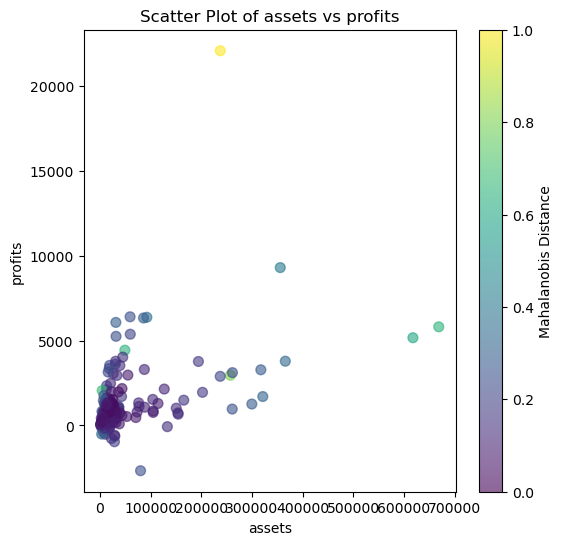

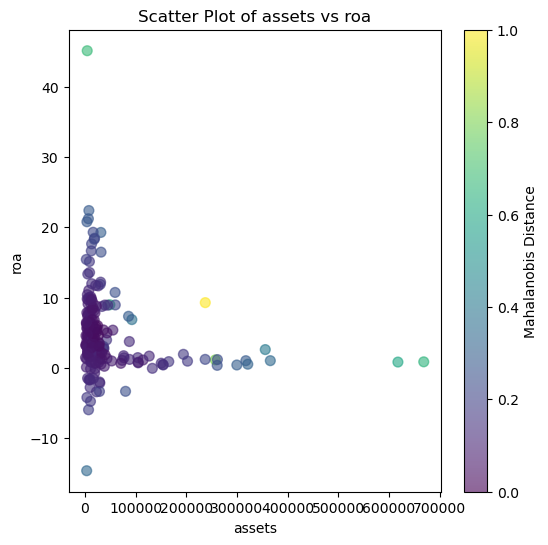

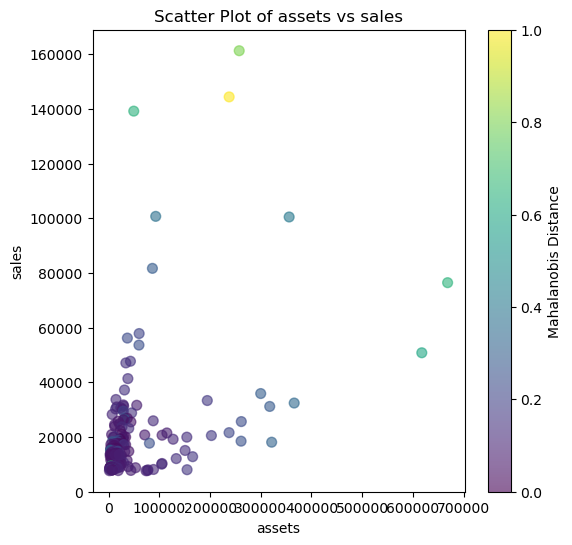

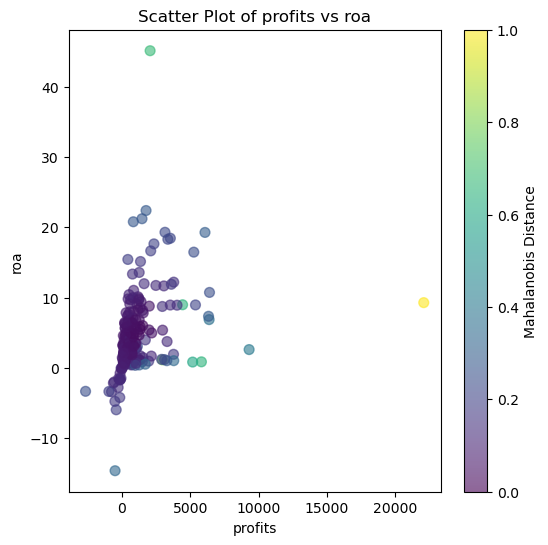

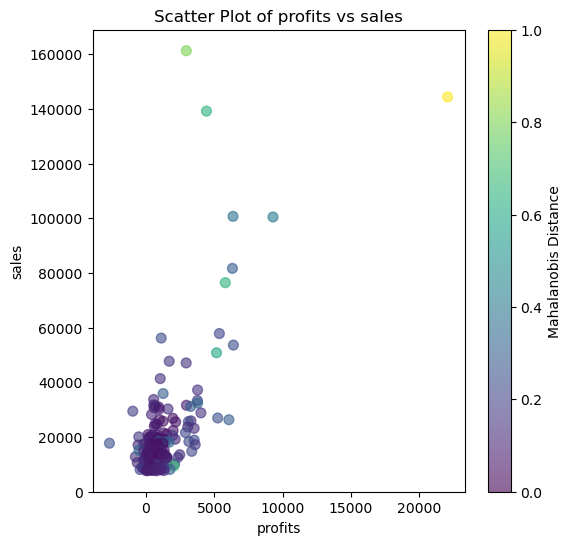

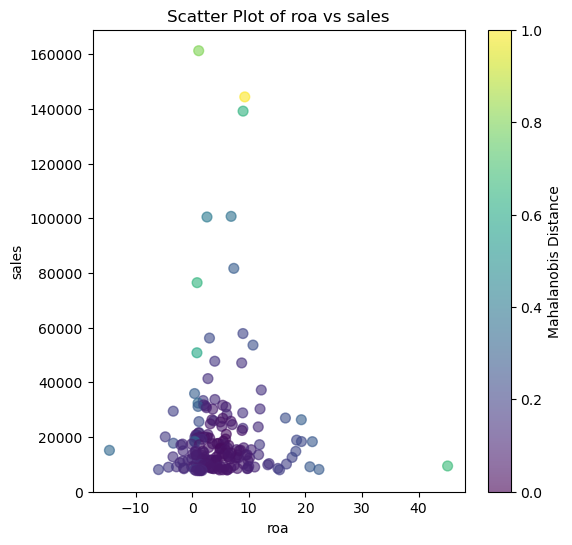

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, means_total, invcov_matrix), axis=1)

# Definir los colores basados en la distancia de Mahalanobis
colors = plt.cm.viridis(mahalanobis_dist / max(mahalanobis_dist))

# Iterar sobre cada par de características y graficar
for i, feature_i in enumerate(df2.columns):
    for j, feature_j in enumerate(df2.columns):
        if i < j:  # Para evitar gráficos duplicados y gráficos en la diagonal
            plt.figure(figsize=(6, 6))
            plt.scatter(df2[feature_i], df2[feature_j], c=colors, cmap='viridis', s=50, alpha=0.6)
            plt.title(f'Scatter Plot of {feature_i} vs {feature_j}')
            plt.xlabel(feature_i)
            plt.ylabel(feature_j)
            plt.colorbar(label='Mahalanobis Distance')
            plt.show()

#### 4. Identifique la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis en la gráfica del punto anterior.

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1532: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))


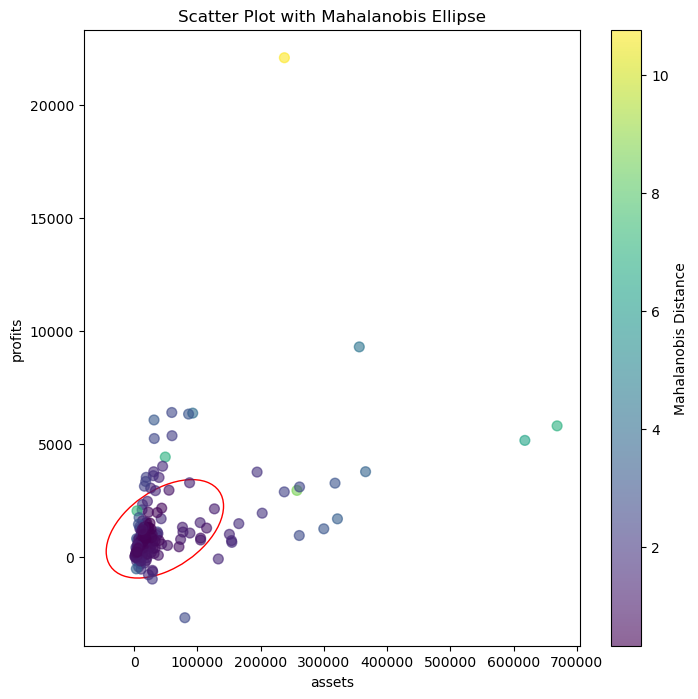

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.spatial import distance

# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['assets', 'profits']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1532: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))


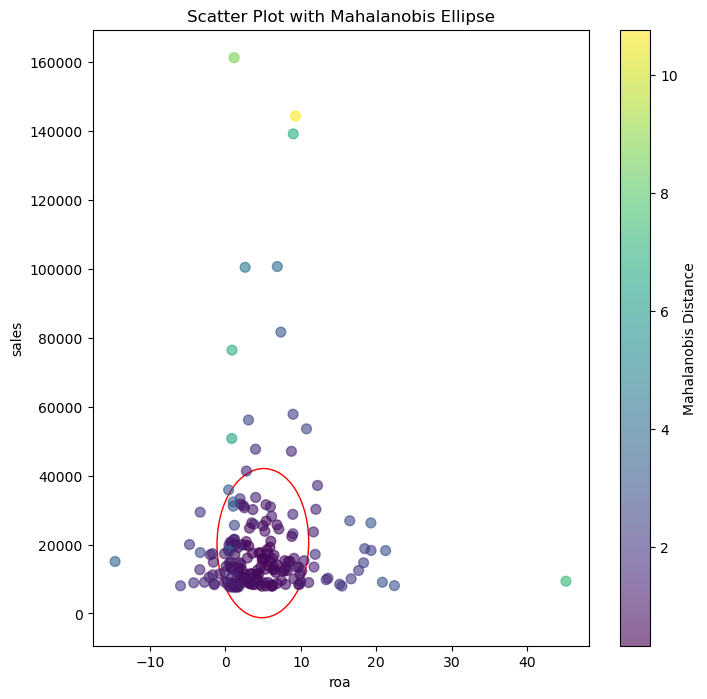

In [20]:

# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['roa', 'sales']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

# PROBLEMA 3

In [21]:
import numpy as np

def forward_substitution(L, b):
    n = len(b)
    x = np.zeros(n)
    
    for i in range(n):
        sum_j = sum(L[i][j] * x[j] for j in range(i))
        x[i] = (b[i] - sum_j) / L[i][i]
    return x

# Matriz triangular inferior L y vector b
L = np.array([[1, 0, 0], [2, 1, 0], [3, 4, 1]], dtype=float)
b = np.array([1, 2, 3], dtype=float)

# Solución del sistema lineal
x = forward_substitution(L, b)
print("Solución particular:", x)


Solución particular: [1. 0. 0.]


# PROBLEMA 4